In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

# Hands-on Activity 8.3: Sampling Estimates of Expectations

## Objectives

- To use the law of large numbers to estimate expectations 

## The law of large numbers

### The strong law of large numbers
Take an infinite series of independent random variables $X_1,X_2,\dots$ with the same distribution, any distribution.
Such a sequence of random variables is typically called an iid sequence for *independnet identically distributed*.
Let $\mu = \mathbb{E}[X_i]$ be the common mean of these random variables.
The *strong law of larger numbers* states the sampling average,
$$
\bar{X}_N = \frac{X_1+\dots X_N}{N} = \frac{1}{N}\sum_{i=1}^NX_i,
$$
converges almost surely to $\mu$ as the number of samples $N$ goes to infinity.
Mathematically, we write:
$$
\bar{X}_N=\frac{1}{N}\sum_{i=1}^NX_i\rightarrow \mu\;\text{a.s.}
$$
The a.s. (almost surely) is a technical term from measure theory which means that the probability of this convergence happening is one.

### Demonstration with a synthetic example
Let's demonstrate the law of large numbers.
We are going to take a Beta random variable:
$$
X\sim\text{Beta}(\alpha,\beta),
$$
where $\alpha$ and $\beta$ is positive numbers.
We know that the expectation of the Beta is (see [wiki](https://en.wikipedia.org/wiki/Beta_distribution)):
$$
\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}.
$$
Let's test if the law of large numbers holds:

In [11]:
import scipy.stats as st

# Create a Beta:
alpha = 2.0
beta = 3.0
X = st.beta(alpha, beta)

# The number of samples to take
N = 10000000
x_samples = X.rvs(N)

# Find the real mean (expectation):
mu = X.mean()
# Find the sampling estimate of the mean:
x_bar = x_samples.mean()

# Print the results
print('E[X] = {0:1.4f}'.format(mu))
print('The law of large numbers with N={0:d} samples estimates it as: {1:1.4f}'.format(N, x_bar))

E[X] = 0.4000
The law of large numbers with N=10000000 samples estimates it as: 0.4000


### Questions

+ Increase the number of samples $N$ until you get closer to the correct answer.

### The Monte Carlo method for estimating integrals
Now we will use the strong law of large numbers to estimate integrals.
In particular, we will start with this integral:
$$
I = \mathbb{E}[g(X)]=\int g(x) p(x) dx,
$$
where $X\sim p(x)$ and $g(x)$ is a function of $x$.
Let $X_1,X_2,\dots$ be independent copies of $X$.
Then consider the random variables $Y_1 = g(X_1), Y_2 = g(X_2), \dots$
These random variables are also independent and identically distributed.
So, the strong law of large number holds for them and we get that their sampling average converges to their mean:
$$
\bar{I}_N=\frac{g(X_1)+\dots+g(X_N)}{N}=\frac{Y_1+\dots+Y_N}{N}\rightarrow I,\;\text{a.s.}
$$
This is the *Monte Carlo way for estimating integrals*.

### Example: 1D expectation
Let's try it out with a test function in 1D (Example 3.4 of Robert & Casella (2004)).
Assume that $X\sim\mathcal{U}([0,1])$ and pick:
$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$
The correct value for the expectation can be found analytically and it is:
$$
\mathbb{E}[g(x)] = 0.965.
$$

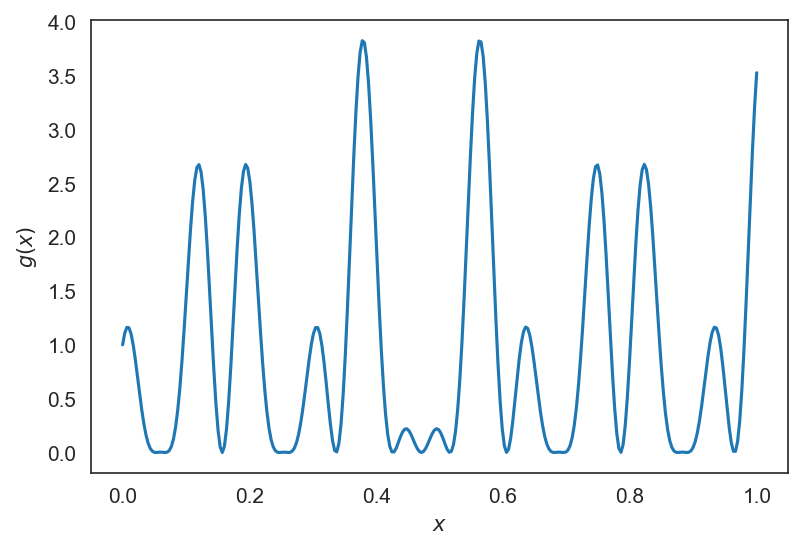

In [12]:
# Define the function
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Let's visualize is first
fig, ax = plt.subplots(dpi=150)
x = np.linspace(0, 1, 300)
ax.plot(x, g(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$g(x)$');

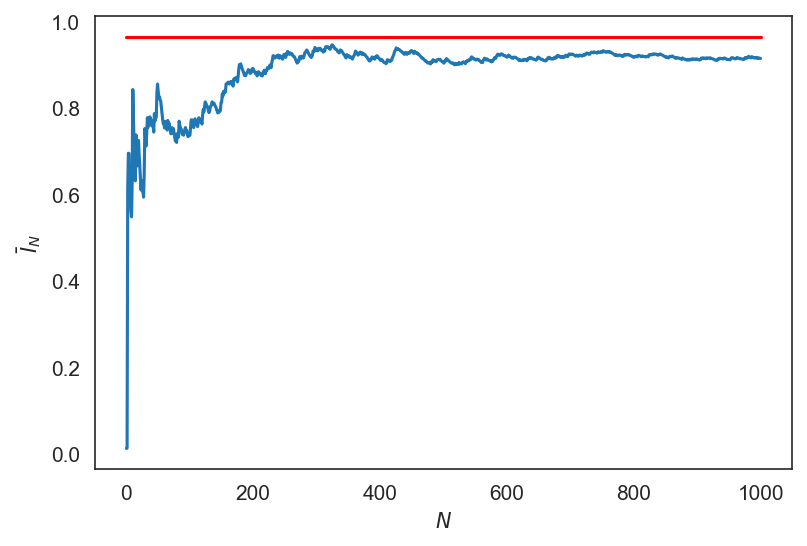

In [22]:
# Number of samples to take
N = 1000
# Generate samples from X
x_samples = np.random.rand(N)
# Get the corresponding Y's
y_samples = g(x_samples)
# Evaluate the sample average for all sample sizes (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
I_running = np.cumsum(y_samples) / np.arange(1, N + 1)

# Make the plot
fig, ax = plt.subplots(dpi=150)
ax.plot(np.arange(1, N+1), I_running)
ax.plot(np.arange(1, N+1), [0.965] * N, color='r')
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{I}_N$');

### Questions

+ Increase ``N`` until you get an answer that is close enough to the correct answer (the red line).
+ Reduce ``N`` back to a small number, say 1,000. Run the code 2-3 times to observe that every time you get a slightly different answer...